In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

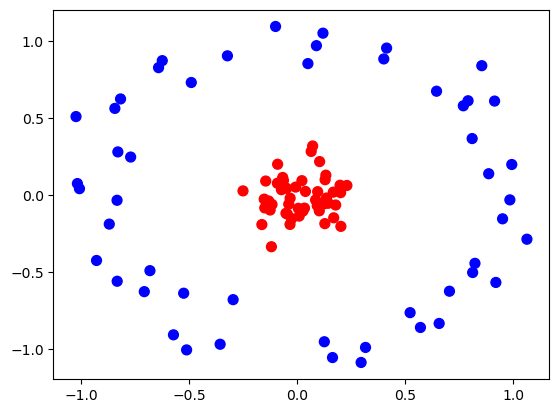

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# kernel="linear"

In [4]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.3

In [6]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


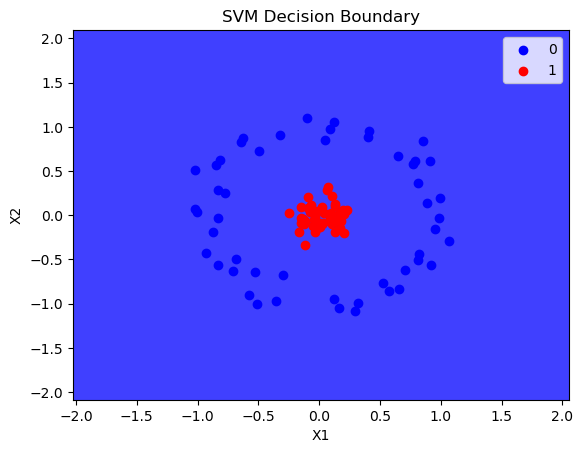

In [7]:
plot_decision_boundary(X, y, classifier)

# Apply radial basis function kernel(rbf):-

First Create rbf 3d Plot:-

In [8]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3DSubplot:xlabel='X1', ylabel='X2'>

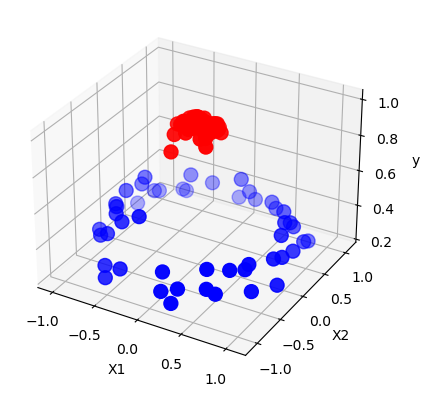

In [9]:
plot_3d_plot(X,y)

In [10]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


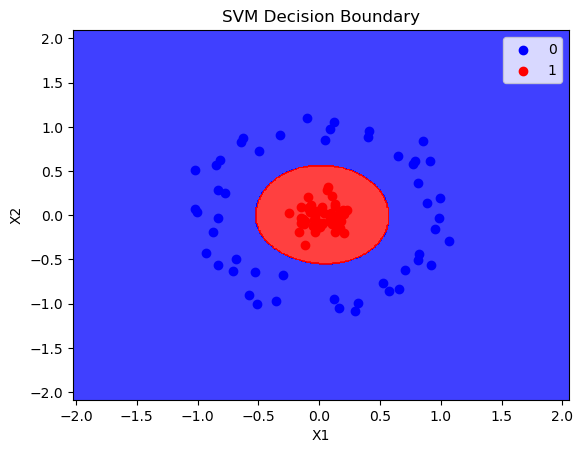

In [12]:
plot_decision_boundary(X, y, rbf_classifier)

# Apply Poly Kernal:-

In [13]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


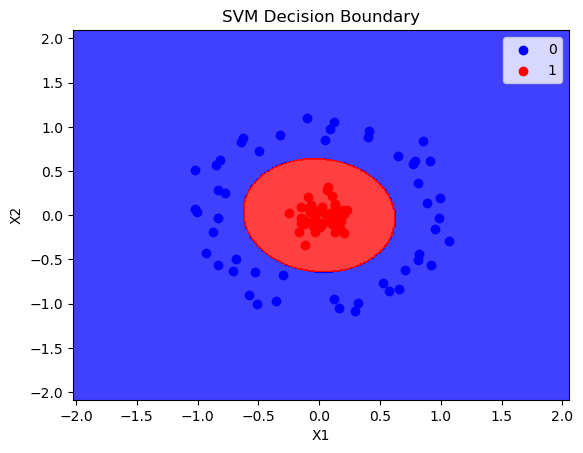

In [15]:
plot_decision_boundary(X, y, poly_classifier)

In [16]:
X

array([[-0.6823153 , -0.48970604],
       [ 0.12905067,  0.10081902],
       [-0.09201446,  0.07779128],
       [ 0.02149808,  0.0945493 ],
       [-0.10045356,  1.09568366],
       [ 0.41395043,  0.9554837 ],
       [-0.11969076, -0.33433893],
       [ 0.10366811,  0.21845464],
       [-0.06393796,  0.09573103],
       [ 0.00496324, -0.08506715],
       [ 0.08876359,  0.97120918],
       [-0.25127315,  0.02823995],
       [ 0.91409112,  0.61141075],
       [-0.84475259,  0.56370866],
       [-0.07332997,  0.03614824],
       [ 0.95104677, -0.15313355],
       [ 0.16894278, -0.14662824],
       [ 0.57062336, -0.85855119],
       [-0.3234453 ,  0.90514839],
       [-0.92970976, -0.42363071],
       [-0.15037811, -0.08230761],
       [ 0.31627188, -0.98818539],
       [-0.15304791, -0.02549435],
       [ 0.22997074,  0.06340898],
       [-0.29700415, -0.67790973],
       [ 0.10209463, -0.10123822],
       [-0.83466989, -0.03275211],
       [-0.83408372, -0.55847149],
       [-0.13198769,

In [17]:
np.exp(-(X**2)).sum(1)

array([1.41456287, 1.97337085, 1.98553587, 1.99063821, 1.29099665,
       1.24386135, 1.88001496, 1.94270885, 1.98679772, 1.99276507,
       1.3815134 , 1.93801655, 1.12172908, 1.21764607, 1.99333131,
       1.3815712 , 1.95059144, 1.20058072, 1.34141242, 1.2570399 ,
       1.97088855, 1.28143526, 1.97619879, 1.94447499, 1.5471277 ,
       1.97943399, 1.49716766, 1.23078914, 1.98131455, 1.43404992,
       1.98294099, 1.95209881, 1.99854025, 1.29422839, 1.97208073,
       1.34883149, 1.96017819, 1.16528773, 1.97668731, 1.26714889,
       1.98150099, 1.14241497, 1.35969811, 1.99558812, 1.15961425,
       1.42546283, 1.24416114, 1.14917106, 1.29321229, 1.32003414,
       1.99715246, 1.47919638, 1.97644766, 1.96359198, 1.99055945,
       1.13385179, 1.30297052, 1.98172077, 1.99508445, 1.22119226,
       1.95035341, 1.89769284, 1.96575665, 1.49168611, 1.31639055,
       1.39213373, 1.1882123 , 1.95723104, 1.99187228, 1.30852016,
       1.99300599, 1.38896072, 1.3782005 , 1.91993316, 1.28109

In [18]:
X_new=np.exp(-(X**2))

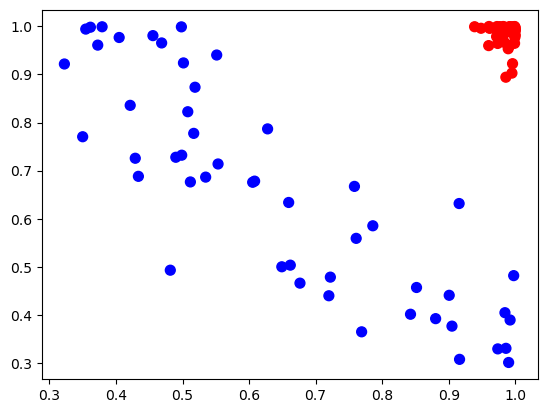

In [19]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')